# 1. Data Preparation:
Download and explore the Global Superstore Orders dataset.
Perform basic data cleaning and preprocessing.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal


In [3]:
from google.colab import files
files.upload()

Saving US Superstore data.csv to US Superstore data (1).csv


{'US Superstore data (1).csv': b'Row ID;Order ID;Order Date;Ship Date;Ship Mode;Customer ID;Customer Name;Segment;Country;City;State;Postal Code;Region;Product ID;Category;Sub-Category;Product Name;Sales;Quantity;Discount;Profit\r\n1;CA-2016-152156;08.11.2016;11.11.2016;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-BO-10001798;Furniture;Bookcases;Bush Somerset Collection Bookcase;261,96;2;0;41,9136\r\n2;CA-2016-152156;08.11.2016;11.11.2016;Second Class;CG-12520;Claire Gute;Consumer;United States;Henderson;Kentucky;42420;South;FUR-CH-10000454;Furniture;Chairs;Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back;731,94;3;0;219,582\r\n3;CA-2016-138688;12.06.2016;16.06.2016;Second Class;DV-13045;Darrin Van Huff;Corporate;United States;Los Angeles;California;90036;West;OFF-LA-10000240;Office Supplies;Labels;Self-Adhesive Address Labels for Typewriters by Universal;14,62;2;0;6,8714\r\n4;US-2015-108966;11.10.2015;18.10.2015;Standard Class;S

In [24]:
df = pd.read_csv('/content/US Superstore data.csv', sep=';', encoding='ISO-8859-1')

In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08.11.2016,11.11.2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2016-152156,08.11.2016,11.11.2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,CA-2016-138688,12.06.2016,16.06.2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,US-2015-108966,11.10.2015,18.10.2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,US-2015-108966,11.10.2015,18.10.2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9994 non-null   int64 
 1   Order ID       9994 non-null   object
 2   Order Date     9994 non-null   object
 3   Ship Date      9994 non-null   object
 4   Ship Mode      9994 non-null   object
 5   Customer ID    9994 non-null   object
 6   Customer Name  9994 non-null   object
 7   Segment        9994 non-null   object
 8   Country        9994 non-null   object
 9   City           9994 non-null   object
 10  State          9994 non-null   object
 11  Postal Code    9994 non-null   int64 
 12  Region         9994 non-null   object
 13  Product ID     9994 non-null   object
 14  Category       9994 non-null   object
 15  Sub-Category   9994 non-null   object
 16  Product Name   9994 non-null   object
 17  Sales          9994 non-null   object
 18  Quantity       9994 non-null

In [28]:
df.duplicated().sum()

0

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  #converting the date
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Quantity
count,9994.000000,9994,9994,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,3.789574
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,2.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,3.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,14.000000
std,2885.163629,NaN,NaN,32063.693350,2.225110


In [29]:
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)
df['Profit'] = df['Profit'].str.replace(',', '.').astype(float)
df['Discount'] = df['Discount'].str.replace(',', '.').astype(float)

In [30]:
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [31]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Sales']= pd.to_numeric(df['Sales'], errors='coerce')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

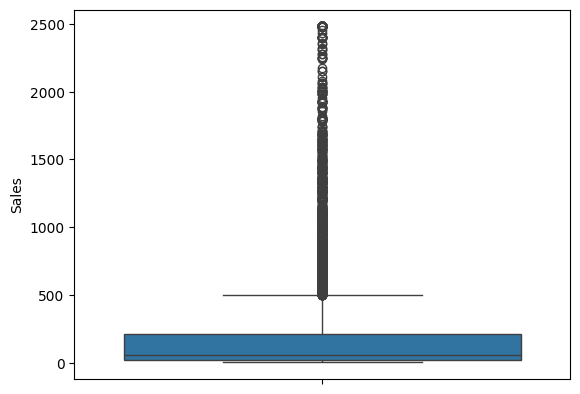

In [20]:
sns.boxplot(df['Sales'])
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

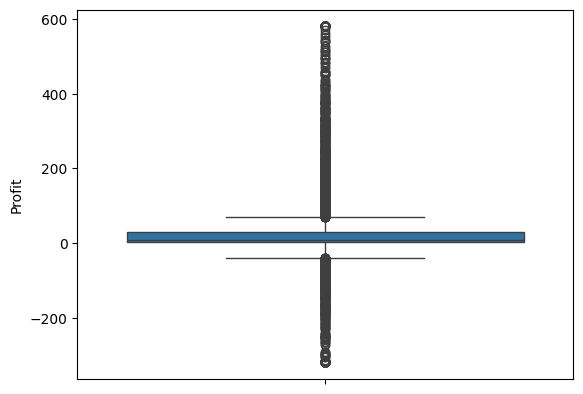

In [19]:
sns.boxplot(df['Profit'])
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

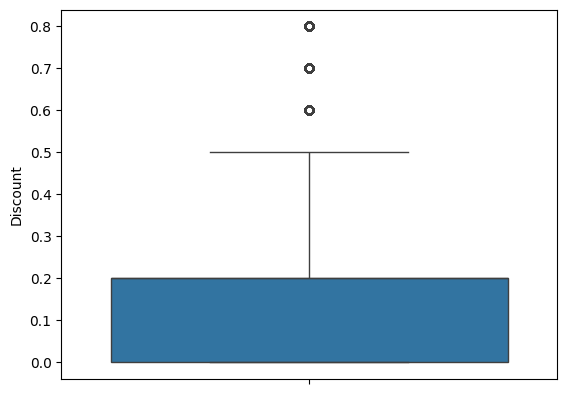

In [17]:
sns.boxplot(df['Discount'])
plt

In [32]:
df['Sales'] = df['Sales'].clip(lower=df['Sales'].quantile(0.01), upper=df['Sales'].quantile(0.99))
df['Profit'] = df['Profit'].clip(lower=df['Profit'].quantile(0.01), upper=df['Profit'].quantile(0.99))


# 2. Data Visualization with Plotly:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.

In [41]:
sales_by_year = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

fig = px.line(sales_by_year, x='Order Date', y='Sales', title='Sales Trends Over the Years')
#Setting up the design
fig.update_layout(template='plotly_white')  #theme
fig.update_layout(
    title={
        'text': 'Sales Trends Over the Years',  #inscriptions
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top' },
    xaxis_title='Year',
    yaxis_title='Sales',
    font=dict(
        family='Arial, sans-serif',
        size=18,
        color='black'
    ),
    xaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=16)
    ),
    yaxis=dict(title_font=dict(size=18),
        tickfont=dict(size=16)
        )
)
fig.update_traces(line_color='red') #line

fig.show()




don't see the need to use Plotly for the first chart (where there is one sales line by year)
, but if we looked at trends by product categories or even by the products themselves, it would make sense

In [42]:
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

In [43]:
fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names', color='Sales',
                    hover_name='Country', title='Sales Distribution by Country')
fig.update_layout(template='plotly_white')
fig.update_layout(
    title={
        'text': 'Sales Distribution by Country',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top' },
    font=dict(
        family='Arial, sans-serif',
        size=18,
        color='black'
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
fig.show()

# It seems that there is only America here

If there were different countries here, or to make the same one for the states of America, it would look impressive

# 3. Data Visualization with Plotnine:
Use Plotnine to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.

In [71]:
top_products = df.groupby(['Product Name', 'Product ID'])['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

In [72]:
top_products['Product ID'] = pd.Categorical(top_products['Product ID'], categories=top_products['Product ID'],ordered=True) #added for better visual from top1 to top 10

In [63]:
top_products.head()

,,Sales
Product Name,Product ID,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,OFF-BI-10003527,19017.6210
GBC DocuBind TL300 Electric Binding System,OFF-BI-10001359,17790.3462
HON 5400 Series Task Chairs for Big and Tall,FUR-CH-10002024,16964.8430
Hewlett Packard LaserJet 3310 Copier,TEC-CO-10001449,15004.9578
Global Troy Executive Leather Low-Back Tilter,FUR-CH-10001215,12975.3820


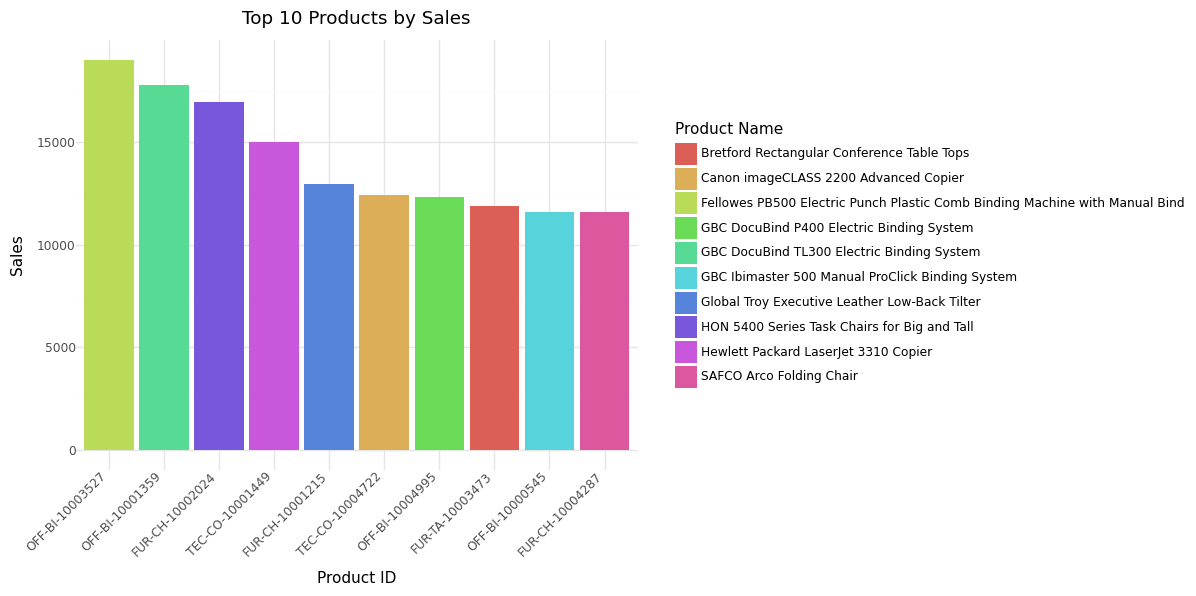

In [73]:
plot = (
    ggplot(top_products.reset_index(), aes(x='Product ID', y='Sales', fill='Product Name')) +
    geom_bar(stat='identity') +
    labs(title='Top 10 Products by Sales', x='Product ID', y='Sales', fill='Product Name') +
    theme_minimal() +
    theme(
        figure_size=(12, 6),
        axis_text_x=element_text(angle=45, hjust=1)   # for better view on x axis
    )
)

plot.draw()

For this graph, plotine came up as well as possible , it looks bright and vivid

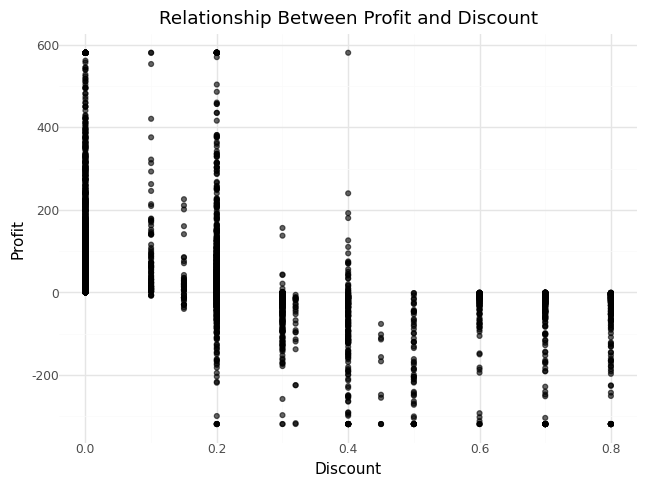

In [68]:
relation_plot = (
    ggplot(df, aes(x='Discount', y='Profit')) +
    geom_point(alpha=0.6) +
    labs(
        title='Relationship Between Profit and Discount',
        x='Discount',
        y='Profit'
    ) +
    theme_minimal()
)
relation_plot.draw()

According to this graph, it can be said that a discount of more than 40% is most often not profitable, and more than 50% generally lead to losses

It seems to me that Plotly is really necessary for large amounts of data, where, for example, there are many different parameters and this will be really relevant. Or you need to use tools such as maps, which will clearly demonstrate the analytical findings
Also, in my opinion, the basic tools in plotly are much easier to build than elsewhere, I understand that plotine also provides a lot of visualization tools, but personally it is the hardest for me to work with it.  For me, it is the least logical of all the visualization libraries.